<a href="https://colab.research.google.com/github/eng-akash/MachineLearning/blob/main/SocialNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [1]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


Data loading

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')


In [3]:
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


removing outliers

In [4]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Age' and 'EstimatedSalary'
df_no_outliers = remove_outliers(df, 'Age')
df_no_outliers = remove_outliers(df_no_outliers, 'EstimatedSalary')

print("Original Data:")
print(df.describe())

print("\nFiltered Data:")
print(df_no_outliers.describe())


Original Data:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

Filtered Data:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.

replace all category to binary representation

In [5]:
df['Gender'].replace({'Female': '0', 'Male': '1'},inplace = True)

In [6]:
print(df)

      User ID Gender  Age  EstimatedSalary  Purchased
0    15624510      1   19            19000          0
1    15810944      1   35            20000          0
2    15668575      0   26            43000          0
3    15603246      0   27            57000          0
4    15804002      1   19            76000          0
..        ...    ...  ...              ...        ...
395  15691863      0   46            41000          1
396  15706071      1   51            23000          1
397  15654296      0   50            20000          1
398  15755018      1   36            33000          0
399  15594041      0   49            36000          1

[400 rows x 5 columns]


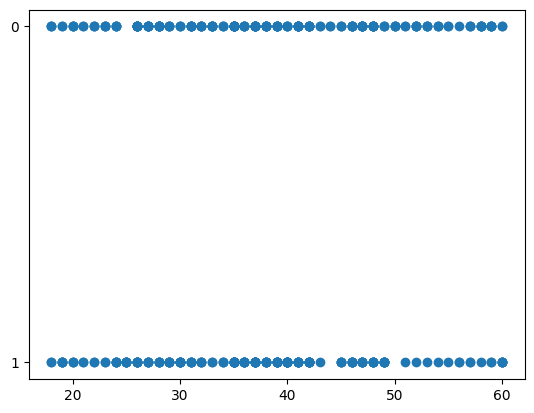

In [7]:
plt.scatter(x = 'Age', y = 'Gender',data = df)

In [8]:
from sklearn.model_selection import train_test_split

testing and training data

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df[['Age']],df['Gender'],test_size = 0.2)

In [12]:
len(x_train)

320

In [13]:
len(x_test)

80

In [14]:
x_test

,Age
93,29
238,46
172,26
318,45
23,45
...,...
396,51
177,25
127,26
241,38


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
lr.predict(x_test)

array(['1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0',
       '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '0', '1'], dtype=object)

model prediction

In [22]:
lr.predict([[46]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)